# Intro ML Homework 4
## Name: Jaskin Kabir
## Student ID: 801186717
Github: https://github.com/jaskinkabir/Intro_ML/tree/main/HM4

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics

cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)



In [3]:
scale = True
if scale:
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)


In [4]:
K=30
accuracy_hist = np.zeros(K)
precision_hist = np.zeros(K)
recall_hist = np.zeros(K)
f1_hist = np.zeros(K)

for k in range(1,K+1):
    extraction = PCA(n_components=k)  
    X_train_pca = extraction.fit_transform(X_train)
    X_test_pca = extraction.transform(X_test)
    
    model = SVC(kernel='linear').fit(X_train_pca, Y_train)
    
    Y_pred = model.predict(X_test_pca)
    
    accuracy_hist[k-1] = metrics.accuracy_score(Y_test, Y_pred)
    precision_hist[k-1] = metrics.precision_score(Y_test, Y_pred)
    recall_hist[k-1] = metrics.recall_score(Y_test, Y_pred)
    f1_hist[k-1] = metrics.f1_score(Y_test, Y_pred)
    

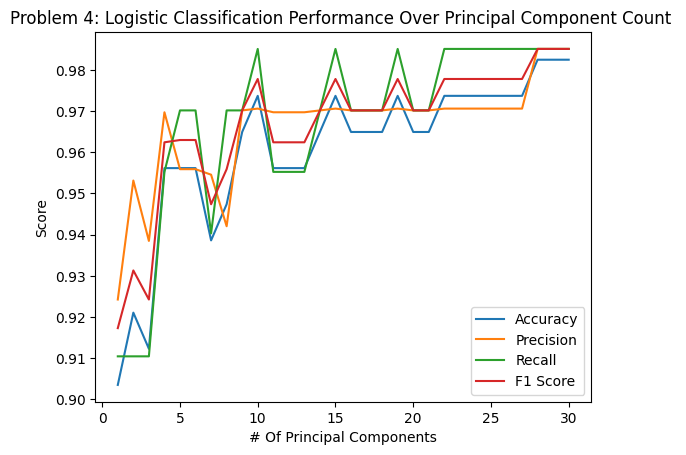

Max precision at K = 28; 0.9850746268656716
Max accuracy at K = 28; 0.9824561403508771
Max recall at K = 10; 0.9850746268656716
Max F1 Score at K = 28; 0.9850746268656716


In [5]:
K = range(1,k+1)
plt.title("Problem 4: Logistic Classification Performance Over Principal Component Count ")
plt.xlabel("# Of Principal Components")
plt.ylabel("Score")
plt.plot(K,accuracy_hist, label='Accuracy')
plt.plot(K,precision_hist, label = 'Precision')
plt.plot(K,recall_hist, label = 'Recall')
plt.plot(K,f1_hist, label = 'F1 Score')

plt.legend()
plt.show()
print(f'Max precision at K = {np.argmax(precision_hist)+1}; {max(precision_hist)}')
print(f"Max accuracy at K = {np.argmax(accuracy_hist)+1}; {max(accuracy_hist)}")
print(f"Max recall at K = {np.argmax(recall_hist)+1}; {max(recall_hist)}")
print(f"Max F1 Score at K = {np.argmax(f1_hist)+1}; {max(f1_hist)}")

In [6]:
from sklearn.inspection import DecisionBoundaryDisplay
extraction = PCA(n_components=28)  
X_train_pca = extraction.fit_transform(X_train)
X_test_pca = extraction.transform(X_test)

model = SVC(kernel='linear').fit(X_train_pca, Y_train)

Y_pred = model.predict(X_test_pca)


In [7]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
K = len(kernels)
accuracy_hist = np.zeros(K)
precision_hist = np.zeros(K)
recall_hist = np.zeros(K)
f1_hist = np.zeros(K)

for kernel in kernels:
    model = SVC(kernel=kernel).fit(X_train_pca, Y_train)
    Y_pred = model.predict(X_test_pca)
    
    accuracy_hist[kernels.index(kernel)] = metrics.accuracy_score(Y_test, Y_pred)
    precision_hist[kernels.index(kernel)] = metrics.precision_score(Y_test, Y_pred)
    recall_hist[kernels.index(kernel)] = metrics.recall_score(Y_test, Y_pred)
    f1_hist[kernels.index(kernel)] = metrics.f1_score(Y_test, Y_pred)


In [8]:
kernel_results = pd.DataFrame({'Kernel': kernels, 'Accuracy': accuracy_hist-max(accuracy_hist), 'Precision': precision_hist-max(precision_hist), 'Recall': recall_hist-max(recall_hist), 'F1 Score': f1_hist-max(f1_hist)})

print('\n')
print(kernel_results)

print("\n Best Kernel is RBF")






    Kernel  Accuracy  Precision    Recall  F1 Score
0   linear  0.000000   0.000000 -0.014925 -0.000219
1     poly -0.078947  -0.126100  0.000000 -0.061156
2      rbf  0.000000  -0.014060  0.000000  0.000000
3  sigmoid -0.070175  -0.059701 -0.074627 -0.059921

 Best Kernel is RBF


In [9]:
model = SVC(kernel='rbf').fit(X_train_pca, Y_train)
Y_pred = model.predict(X_test_pca)

report = metrics.classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.97      1.00      0.99        67

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

